In [1]:
#import libraries

from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
IMAGE_SIZE = [224, 224]

In [3]:
import IPython.display
from IPython.display import Image, display
#display(Image())

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
!pip install Pillow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [14]:
import PIL

In [9]:
#!ls '/content/drive'

MyDrive  Shareddrives


In [19]:
train_path = '/content/drive/MyDrive/NIT-Agartala-Deep-Learning-Course/DL-Frameworks/Train'
test_path = '/content/drive/MyDrive/NIT-Agartala-Deep-Learning-Course/DL-Frameworks/Test'

Working with 18 images
Image examples: 
class_0_4.JPG
3888 2592
224 224


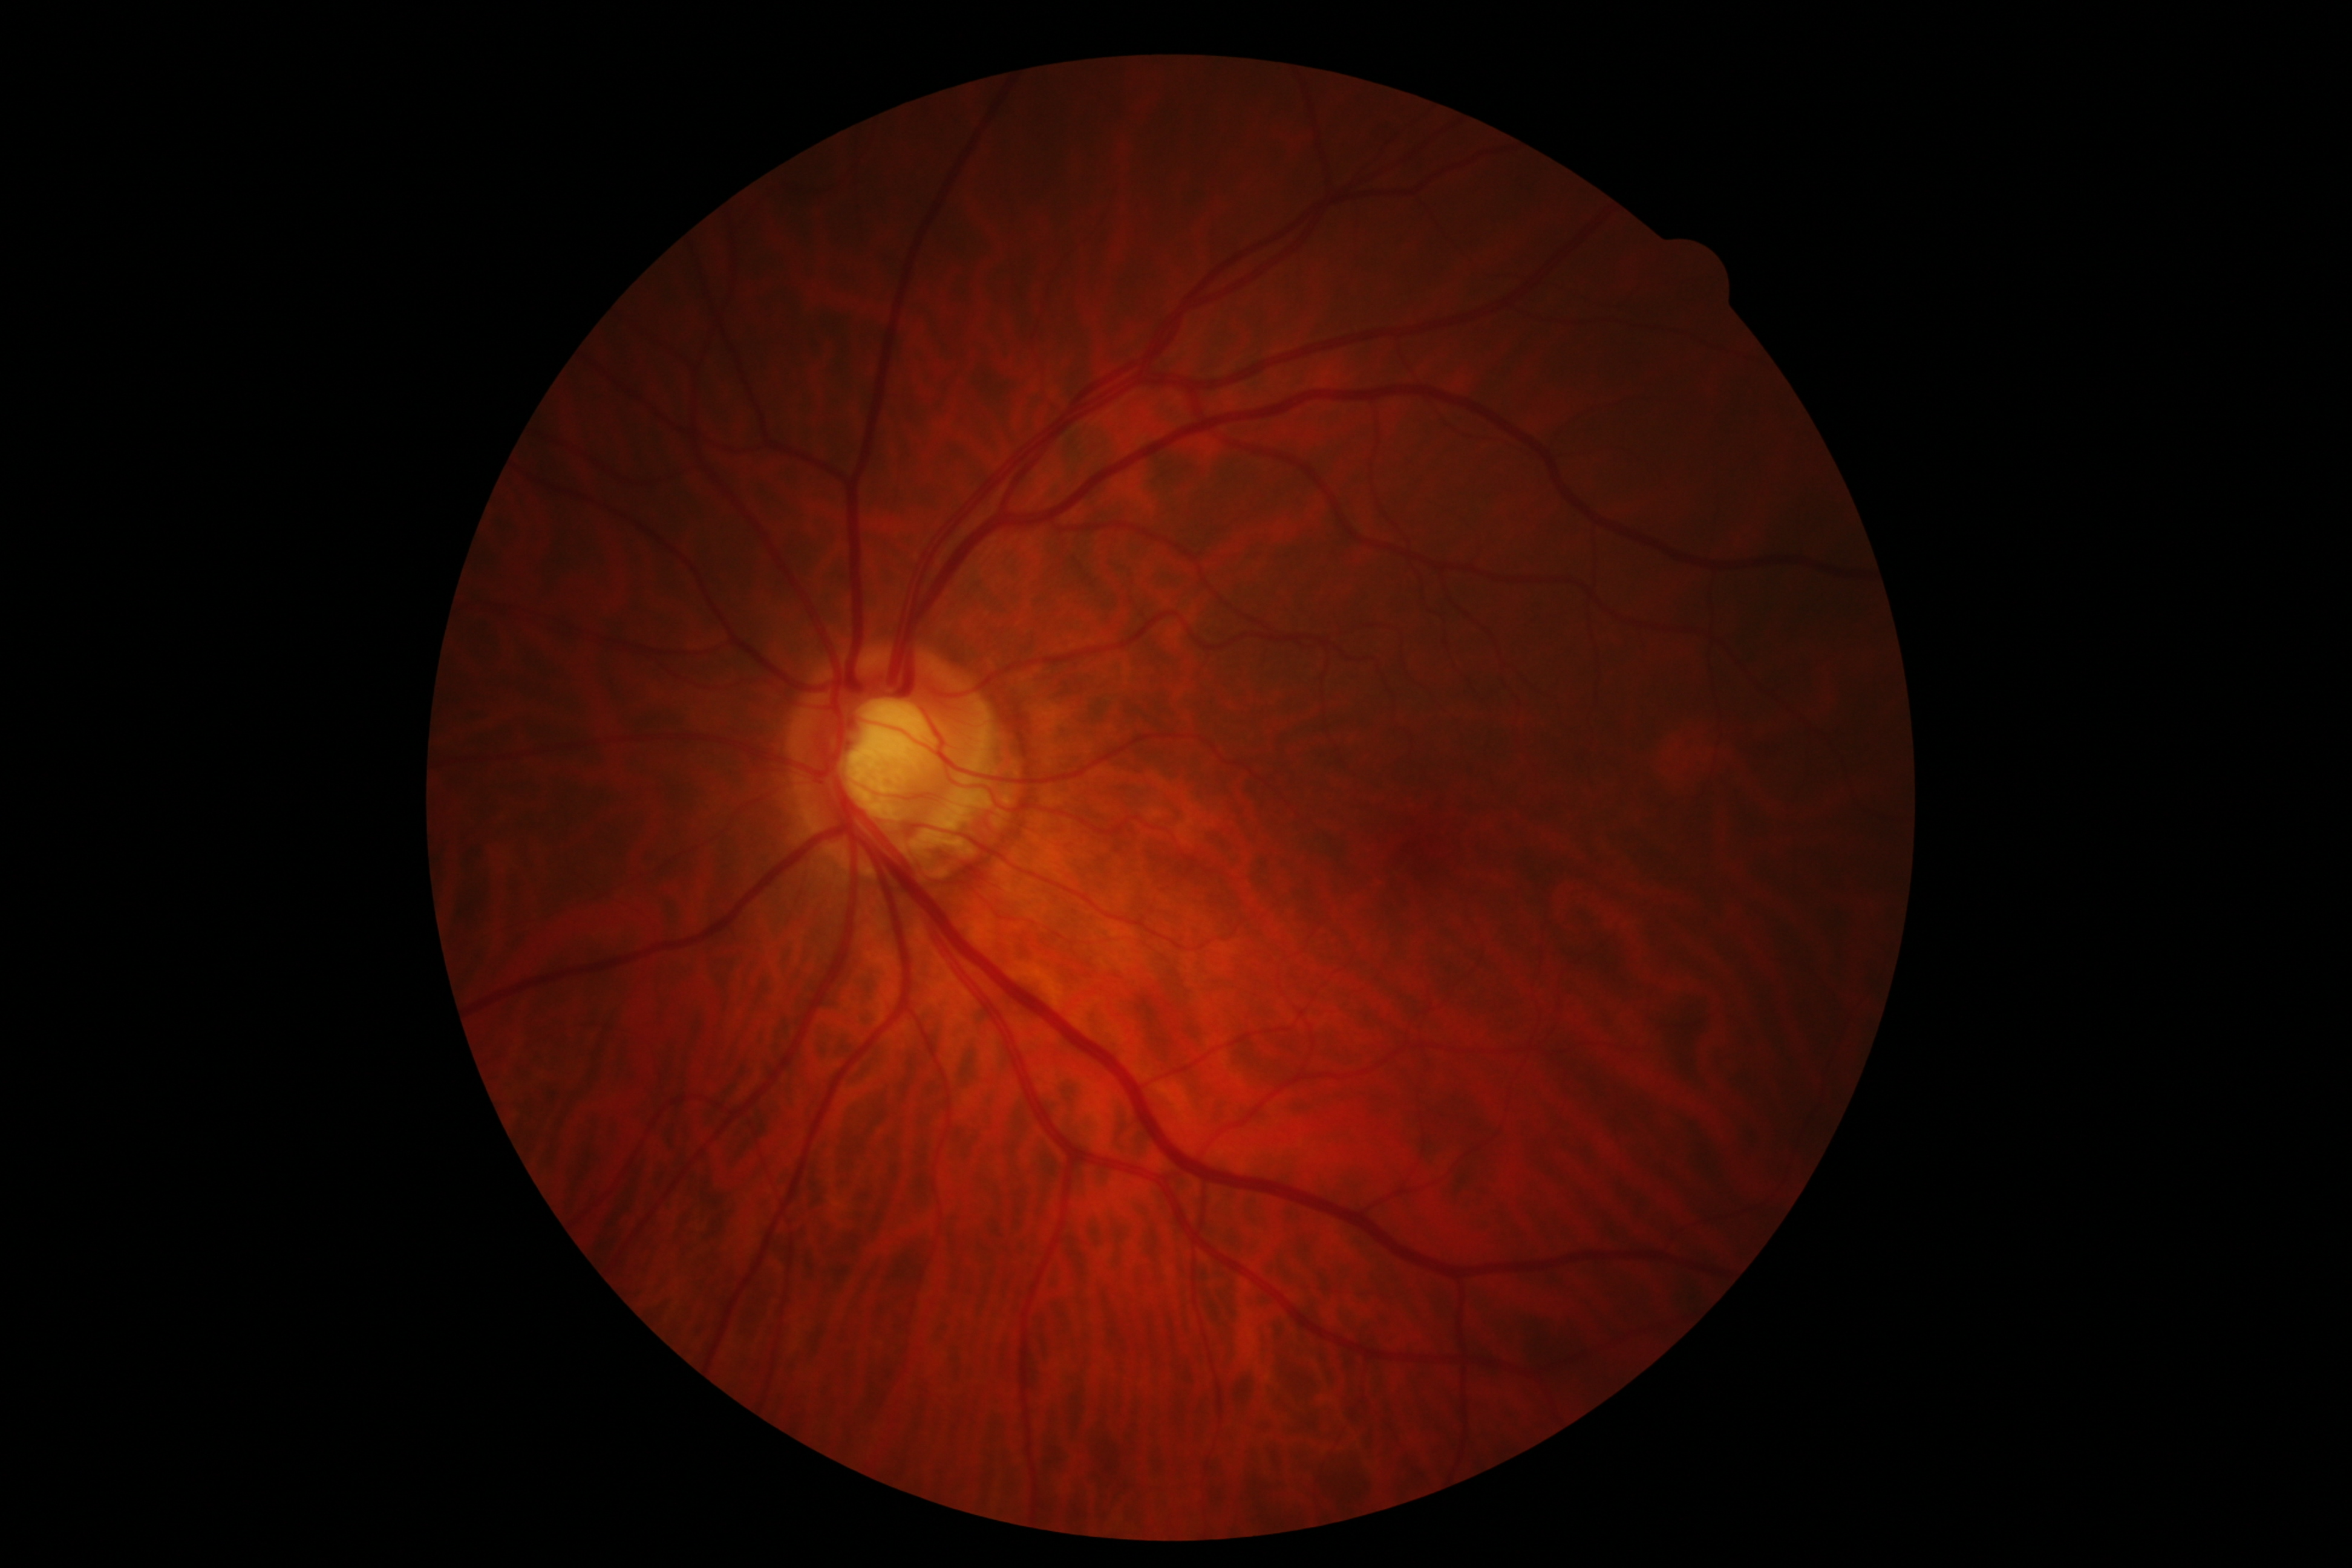

class_0_5.JPG
5184 3456
224 224


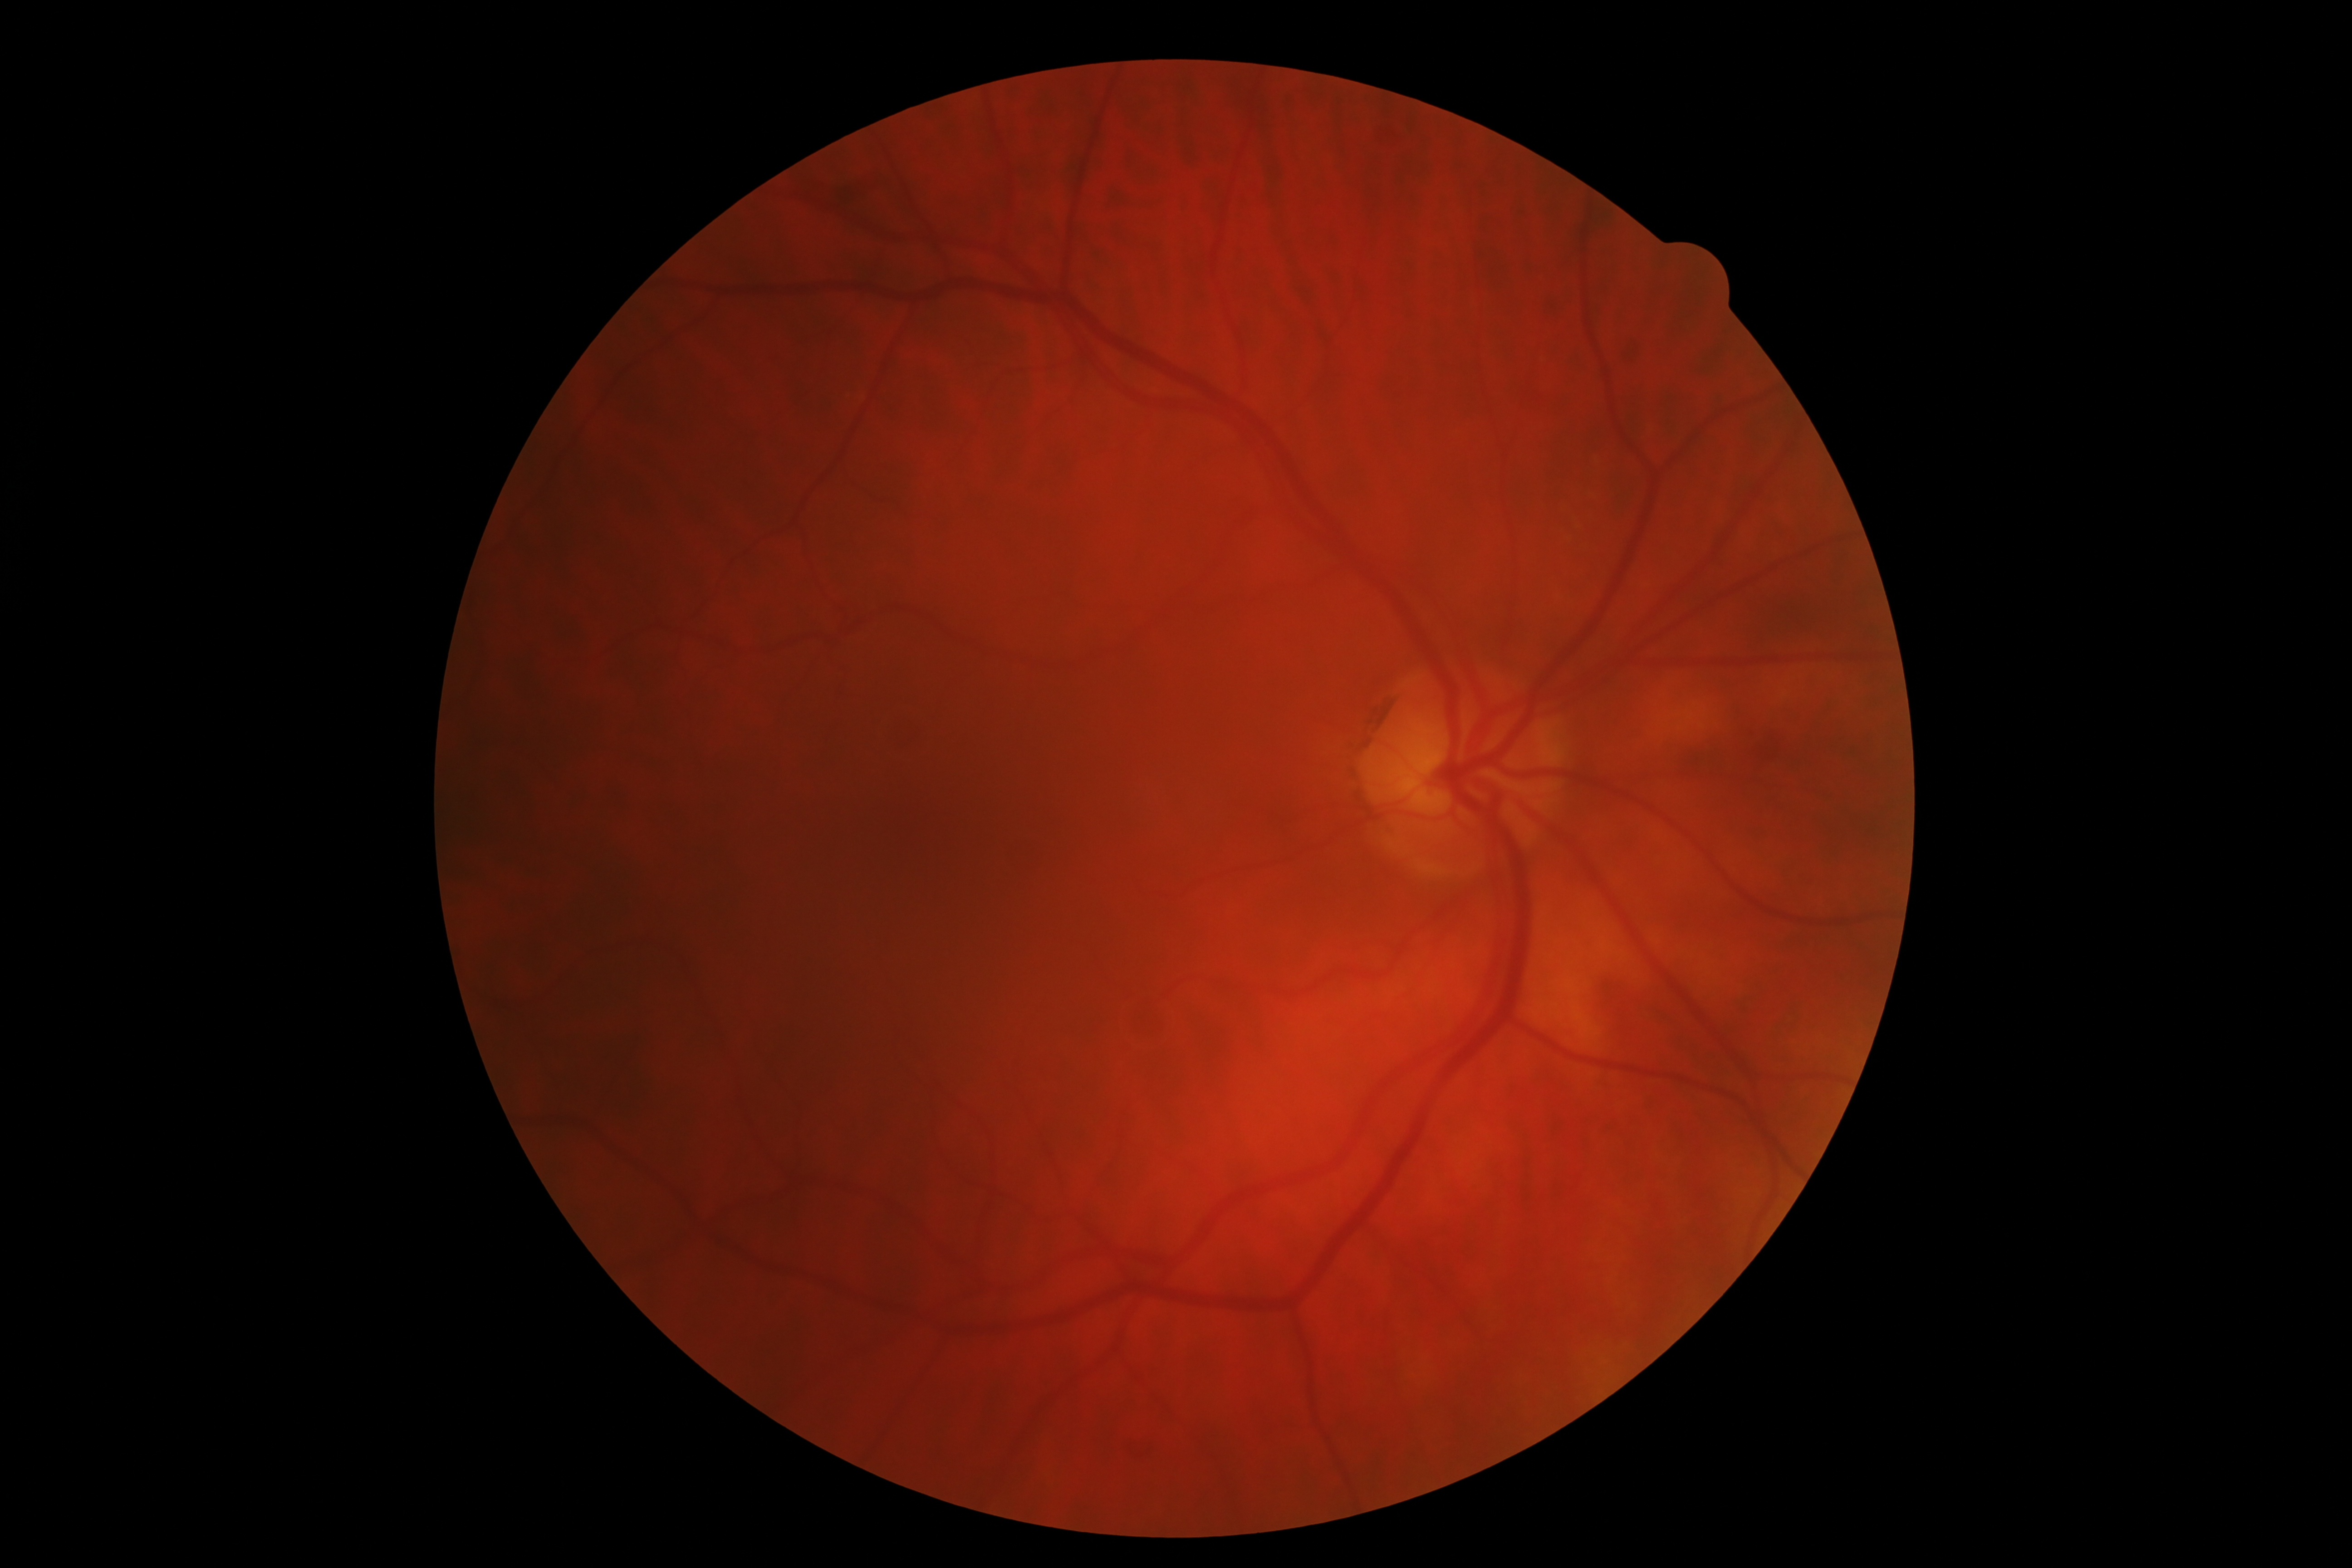

In [20]:
from PIL import Image 
import os 
from IPython.display import display
from IPython.display import Image
#from IPython.display import Image as _Imgdis
# creating a object  

  
folder = train_path+'/class_0'


agemacular = [f for f in os.listdir(folder) if os.path.isfile(os.path.join(folder, f))]
print("Working with {} images".format(len(agemacular)))
print("Image examples: ")


for i in range(2):
    print(agemacular[i])
    #display(_Imgdis(filename=folder + "/" + onlybenignfiles[i], width=240, height=240))
    path=folder + "/" + agemacular[i]
    image = PIL.Image.open(path)
    width, height = image.size
    print(width, height)
    image=image.resize([224,224])
    width, height = image.size
    print(width, height)
    display(Image(filename=folder + "/" + agemacular[i], width=240, height=240))


In [18]:
train_path = '/content/drive/MyDrive/NIT-Agartala-Deep-Learning-Course/DL-Frameworks/Train'
test_path = '/content/drive/MyDrive/NIT-Agartala-Deep-Learning-Course/DL-Frameworks/Test'

In [22]:
import tensorflow as tf

In [62]:
train_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [78]:
train_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 1,
                                                 class_mode = 'categorical')

Found 36 images belonging to 2 classes.


In [64]:
test_datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')
#fill_mode='nearest' while resizing increase the size of the image by interpolating the nearest pixels following K-Nearest neighbour (KNN)

In [79]:
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 1,
                                            class_mode = 'categorical')

Found 36 images belonging to 2 classes.


#VGG-16 based Transfer Learning

In [80]:
IMAGE_SIZE = (224, 224,3)

In [81]:
vgg = VGG16(input_shape=(IMAGE_SIZE), weights='imagenet', include_top=False)

##include_top=True means that a fully-connected layer will be added at the end of the model. This is usually what you want if you want the model to actually perform classification. With include_top=True you can specify the parameter classes (defaults to 1000 for ImageNet). With include_top=False, the model can be used for feature extraction, for example to build an autoencoder or to stack any other model on top of it. Note that input_shape and pooling parameters should only be specified when include_top is False.

In [82]:
for layer in vgg.layers:
  layer.trainable = False

In [83]:
vgg.input

<KerasTensor: shape=(None, 224, 224, 3) dtype=float32 (created by layer 'input_5')>

In [84]:
vgg.output

<KerasTensor: shape=(None, 7, 7, 512) dtype=float32 (created by layer 'block5_pool')>

In [85]:
x = Flatten()(vgg.output)
x

<KerasTensor: shape=(None, 25088) dtype=float32 (created by layer 'flatten_8')>

In [86]:
#Total classes
folders = glob('/content/drive/MyDrive/NIT-Agartala-Deep-Learning-Course/DL-Frameworks/Test/*')
print(len(folders))

2


##Adding the last layer

In [87]:
x = Flatten()(vgg.output)
prediction = Dense(1, activation='sigmoid')(x)
#prediction = Dense(len(folders), activation='softmax')(x) #for muticlass classification
model = Model(inputs=vgg.input, outputs=prediction)
model.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

In [88]:
from keras import optimizers


adam = tf.optimizers.Adam(learning_rate=0.001)
model.compile(loss='binary_crossentropy',
              optimizer=adam,
              metrics=['accuracy'])

In [89]:
import datetime

In [95]:
start = datetime.datetime.now()

model_history=model.fit_generator(
  train_ds,
  validation_data=test_ds,
  epochs=10,
  steps_per_epoch=1, 
  validation_steps=1,verbose=1)

#steps_per_epoch=1, 
#validation_steps=1 means how many batches of size 32 it is taking once at a time

duration = datetime.datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


1/1 [==============================] - 35s 35s/step - loss: 2.7008 - accuracy: 0.5517 - val_loss: 1.0473 - val_accuracy: 0.7500
Epoch 2/10
1/1 [==============================] - 41s 41s/step - loss: 0.8749 - accuracy: 0.7931 - val_loss: 1.3449 - val_accuracy: 0.6250
Epoch 3/10
1/1 [==============================] - 42s 42s/step - loss: 0.9196 - accuracy: 0.6552 - val_loss: 1.8405 - val_accuracy: 0.6875
Epoch 4/10
1/1 [==============================] - 34s 34s/step - loss: 1.3933 - accuracy: 0.6897 - val_loss: 1.2749 - val_accuracy: 0.7188
Epoch 5/10
1/1 [==============================] - 41s 41s/step - loss: 0.6302 - accuracy: 0.7931 - val_loss: 0.7031 - val_accuracy: 0.8125
Epoch 6/10
1/1 [==============================] - 40s 40s/step - loss: 0.2603 - accuracy: 0.8621 - val_loss: 1.0819 - val_accuracy: 0.7500
Epoch 7/10
1/1 [==============================] - 34s 34s/step - loss: 0.6891 - accuracy: 0.8276 - val_loss: 1.0968 - val_accuracy: 0.7500
Epoch 8/10
1/1 [======================

In [93]:
model.save('mymodel.h5')

#Print the loss plot

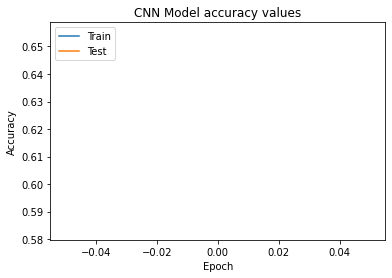

In [94]:
#plt.plot(model_history.history['accuracy'])
#plt.plot(model_history.history['val_accuracy'])
#plt.title('CNN Model accuracy values')
#plt.ylabel('Accuracy')
#plt.xlabel('Epoch')
#plt.legend(['Train', 'Test'], loc='upper left')
#plt.show()

In [ ]:
from datetime import datetime
from keras.callbacks import ModelCheckpoint



checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=2, save_best_only=True)

callbacks = [checkpoint]

start = datetime.now()

model_history=model.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=10,
  steps_per_epoch=5,
  validation_steps=32,
    callbacks=callbacks ,verbose=2)


duration = datetime.now() - start
print("Training completed in time: ", duration)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.


Epoch 1/10

Epoch 00001: val_loss improved from inf to 2.07906, saving model to mymodel.h5
5/5 - 634s - loss: 2.5360 - accuracy: 0.6750 - val_loss: 2.0791 - val_accuracy: 0.7559 - 634s/epoch - 127s/step
Epoch 2/10

Epoch 00002: val_loss improved from 2.07906 to 2.04830, saving model to mymodel.h5
5/5 - 615s - loss: 2.3508 - accuracy: 0.7500 - val_loss: 2.0483 - val_accuracy: 0.7959 - 615s/epoch - 123s/step
Epoch 3/10

Epoch 00003: val_loss did not improve from 2.04830
5/5 - 668s - loss: 1.5510 - accuracy: 0.8625 - val_loss: 2.1727 - val_accuracy: 0.7783 - 668s/epoch - 134s/step
Epoch 4/10


KeyboardInterrupt: ignored

In [ ]:
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('CNN Model accuracy values')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()